# Tugas Kecil II Intelegensi Buatan 

In [116]:
import pandas as pd
import numpy as np
import graphviz
import pickle
import matplotlib.pyplot as plt
import itertools
import random

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## a. Membaca Dataset

### Iris Dataset

In [4]:
iris_data = load_iris()
iris_X = iris_data.data
iris_y = iris_data.target
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Play Tennis Dataset

In [5]:
tennis_data = pd.read_csv('weather.nominal.csv')
tennis_X = tennis_data.drop(["play"], axis=1)
tennis_y = tennis_data["play"]

In [6]:
tennis_X.head()

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False


In [7]:
tennis_y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: play, dtype: object

## b. Full-training

### Naive Bayes 

In [45]:
gnb_model = GaussianNB()
gnb_model.fit(iris_X, iris_y)
iris_predict = gnb_model.predict(iris_X)
print(gnb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


#### Metrics

In [46]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y)
precision = precision_score(y_pred=iris_predict, y_true=iris_y, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y, average='micro')

print("Naive Bayes accuracy : ", accuracy)
print("Naive Bayes precision : ", precision)
print("Naive Bayes recall : ", recall)

Naive Bayes accuracy :  0.96
Naive Bayes precision :  0.96
Naive Bayes recall :  0.96


### Decision Tree

In [52]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(iris_X,iris_y)
iris_predict = dtc_model.predict(iris_X)

#### Metrics

In [53]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y)
precision = precision_score(y_pred=iris_predict, y_true=iris_y, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y, average='micro')

print("Decision Tree accuracy : ", accuracy)
print("Decision Tree precision : ", precision)
print("Decision Tree recall : ", recall)

Decision Tree accuracy :  1.0
Decision Tree precision :  1.0
Decision Tree recall :  1.0


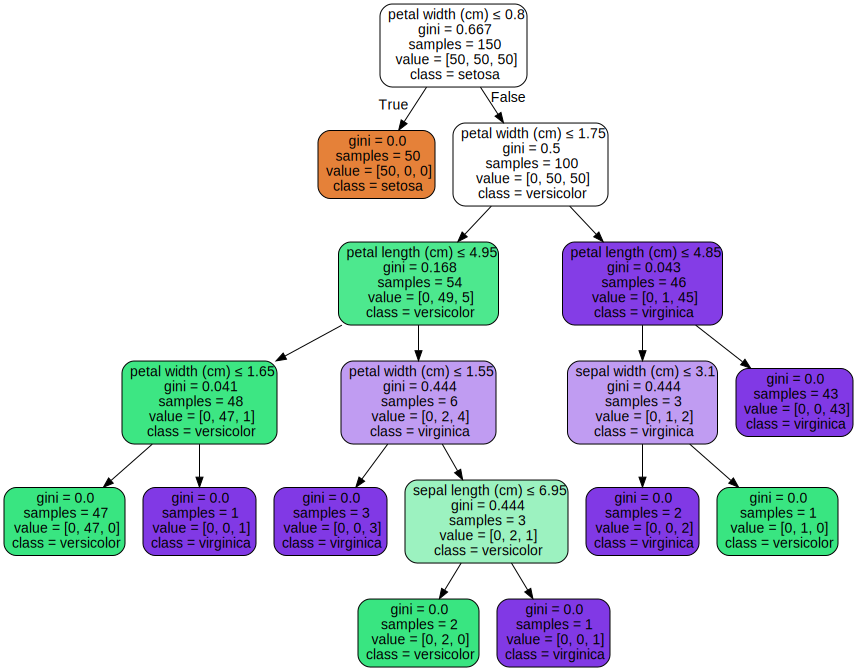

In [54]:
dot_data = export_graphviz(dtc_model, out_file=None, 
                         feature_names=iris_data.feature_names,  
                         class_names=iris_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### kNN

In [55]:
# Haifa

### MLP

In [56]:
# Haifa

## C. Training with *train-test split* 

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Train-test split

In [85]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.1)

### NaiveBayes

In [86]:
# Haifa

### Decision Tree

In [87]:
# Haifa

### kNN

In [88]:
knn_model = KNeighborsClassifier()
knn_model.fit(iris_X_train, iris_y_train)
iris_predict = knn_model.predict(iris_X_test)

###### Metrics

In [89]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y_test)
precision = precision_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')

print("kNN accuracy : ", accuracy)
print("kNN precision : ", precision)
print("kNN recall : ", recall)

kNN accuracy :  1.0
kNN precision :  1.0
kNN recall :  1.0


##### Confusion Matrix

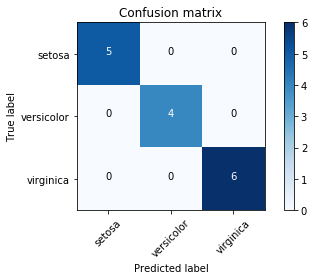

In [90]:
knn_confusion = confusion_matrix(y_pred=iris_predict, y_true=iris_y_test)
plot_confusion_matrix(knn_confusion, iris_data.target_names)

### MLP

In [91]:
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(iris_X_train, iris_y_train)
iris_predict = knn_model.predict(iris_X_test)
print(knn_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


#### Metrics

In [93]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y_test)
precision = precision_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')

print("MLP accuracy : ", accuracy)
print("MLP precision : ", precision)
print("MLP recall : ", recall)

MLP accuracy :  1.0
MLP precision :  1.0
MLP recall :  1.0


#### Confusion Matrix

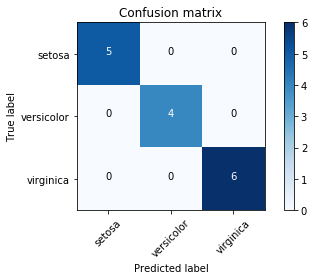

In [94]:
mlp_confusion = confusion_matrix(y_pred=iris_predict, y_true=iris_y_test)
plot_confusion_matrix(mlp_confusion, iris_data.target_names)

## D. Training with *K-Fold* split

### K-Fold split

In [100]:
def train_k_fold(k, model, X, y):
    # define metrics here, can be accuracy, error, etc.
    # the metrics will be accumulated and the average/variance will be calculated for k times
    kf = KFold(k)
    accuracies = []
    precisions = []
    recalls = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        #Train model here and accumulate metrics 
        model.fit(X_train,y_train)
        iris_predict = model.predict(X_test)
        accuracy = accuracy_score(y_pred=iris_predict, y_true=y_test)
        precision = precision_score(y_pred=iris_predict, y_true=y_test, average='micro')
        recall = recall_score(y_pred=iris_predict, y_true=y_test, average='micro')

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        
    avg_accuracy = sum(accuracies)/len(accuracies)
    avg_precision = sum(precisions)/len(precisions)
    avg_recall = sum(recalls)/len(recalls)
    
    return avg_accuracy, avg_precision, avg_recall

### Training Models

#### Naive Bayes

In [104]:
nb_model = GaussianNB()
avg_accuracy,avg_precision, avg_recall = train_k_fold(10, nb_model, iris_X, iris_y)

print("Naive Bayes average accuracy : ", accuracy)
print("Naive Bayes average precision : ", precision)
print("Naive Bayes average recall : ", recall)

Naive Bayes average accuracy :  1.0
Naive Bayes average precision :  1.0
Naive Bayes average recall :  1.0


#### Decision Tree

In [105]:
dtc_model = DecisionTreeClassifier()
avg_accuracy,avg_precision, avg_recall = train_k_fold(10, dtc_model, iris_X, iris_y)

print("Decision Tree average accuracy : ", accuracy)
print("Decision Tree average precision : ", precision)
print("Decision Tree average recall : ", recall)

Decision Tree average accuracy :  1.0
Decision Tree average precision :  1.0
Decision Tree average recall :  1.0


#### kNN

In [106]:
# Haifa

#### MLP

In [107]:
# Haifa

## E. Save model to external file

In [108]:
def save_model_to_file(model, filename):
    pickle.dump(model, open(filename, 'wb'))

#### Naive Bayes

In [109]:
save_model_to_file(nb_model, 'naive_bayes.sav')

#### kNN

In [110]:
save_model_to_file(knn_model, 'naive_bayes.sav')

#### Decision Tree Classifier

In [111]:
save_model_to_file(dtc_model, 'decision_tree.sav')

#### MLP

In [112]:
save_model_to_file(mlp_model, 'mlp.sav')

## F. Read model from external file

In [113]:
# Haifa

## G. Make new instance

In [138]:
new_instance = []
for _ in range(len(iris_data.feature_names)):
    new_instance.append(random.random()*8)

print("New instance")
for i,name in enumerate(iris_data.feature_names):
    print(name, " = ", new_instance[i])

New instance
sepal length (cm)  =  0.2258924455777711
sepal width (cm)  =  4.0580456715348605
petal length (cm)  =  1.079499413203978
petal width (cm)  =  2.3679952045575714


## H. Classification with Models

### Naive Bayes

In [125]:
# Haifa

### Decision Tree

In [126]:
# Haifa

### kNN

In [134]:
# Ody
knn_model.predict([new_instance])

array([2])

### MLP

In [128]:
# Ody